In [2]:
# importing files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading data/csv file

df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')

In [13]:
# checking data

# df.describe()
df.head()
# df.info()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
# checking for null values and 

missing = df.isnull().sum()
missing



date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [6]:
# checking for duplicate values

duplicate = df.duplicated().sum()
duplicate

0

In [7]:
# Removing rows with null values

newDf = df.dropna(how='any', axis=0)

newDf.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [8]:
# Data cleaning is done as we dont have any duplicate or null values as we have removed it earlier

newDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1564 entries, 0 to 1652
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1564 non-null   object 
 1   datetime     1564 non-null   object 
 2   cash_type    1564 non-null   object 
 3   card         1564 non-null   object 
 4   money        1564 non-null   float64
 5   coffee_name  1564 non-null   object 
dtypes: float64(1), object(5)
memory usage: 85.5+ KB


#  **Payment data analysis**

In [9]:
# step 1 Prepare Data: Extract and count the occurrences of different payment methods (like "card").

payment_data = newDf['cash_type'].value_counts()
payment_data


cash_type
card    1564
Name: count, dtype: int64

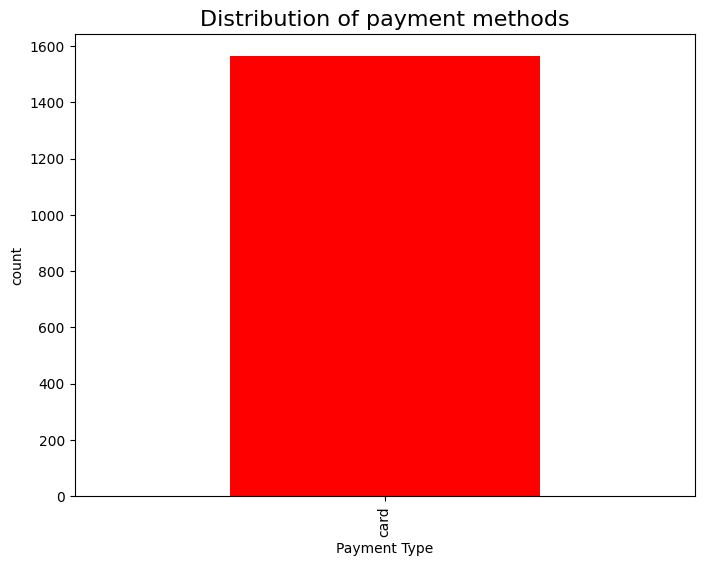

In [10]:
# Plot the data using (Bar Chart)

# create a bar chart
plt.figure(figsize = (8,6))
payment_data.plot(kind='bar', color='red')


# addd titles and labels
plt.title('Distribution of payment methods', fontsize=16)
plt.xlabel('Payment Type', fontsize=10)
plt.ylabel('count', fontsize = 10)

plt.show()

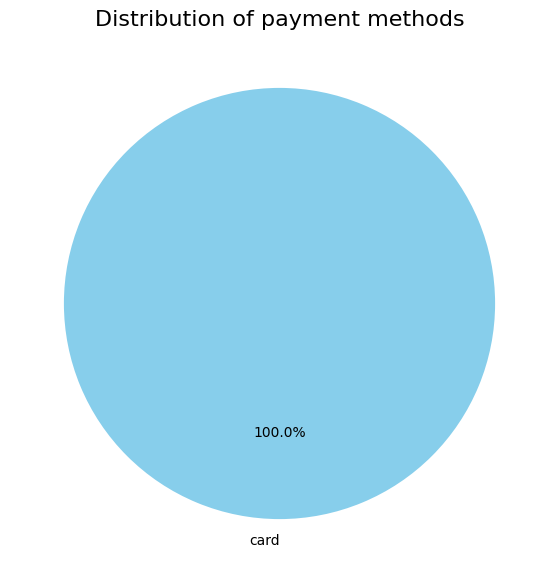

In [28]:
# Plotting pie chart

plt.figure(figsize=(7,7))
payment_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

plt.title('Distribution of payment methods', fontsize=16)
plt.ylabel('')  # Remove the default ylabel

plt.show()

#   Popular Coffee Types

In [11]:
coffeeType = newDf['coffee_name'].value_counts()
coffeeType

coffee_name
Americano with Milk    398
Latte                  345
Cappuccino             239
Americano              217
Cortado                164
Hot Chocolate           82
Espresso                69
Cocoa                   50
Name: count, dtype: int64

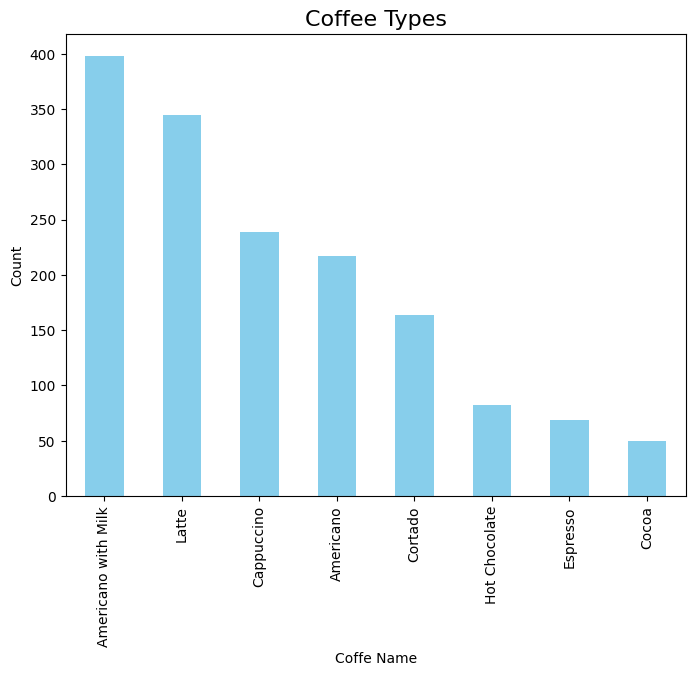

In [12]:
plt.figure(figsize=(8,6))
coffeeType.plot(kind='bar', color='skyblue')

plt.title('Coffee Types', fontsize=16)
plt.xlabel('Coffe Name', fontsize= 10)
plt.ylabel('Count', fontsize= 10)

plt.show()

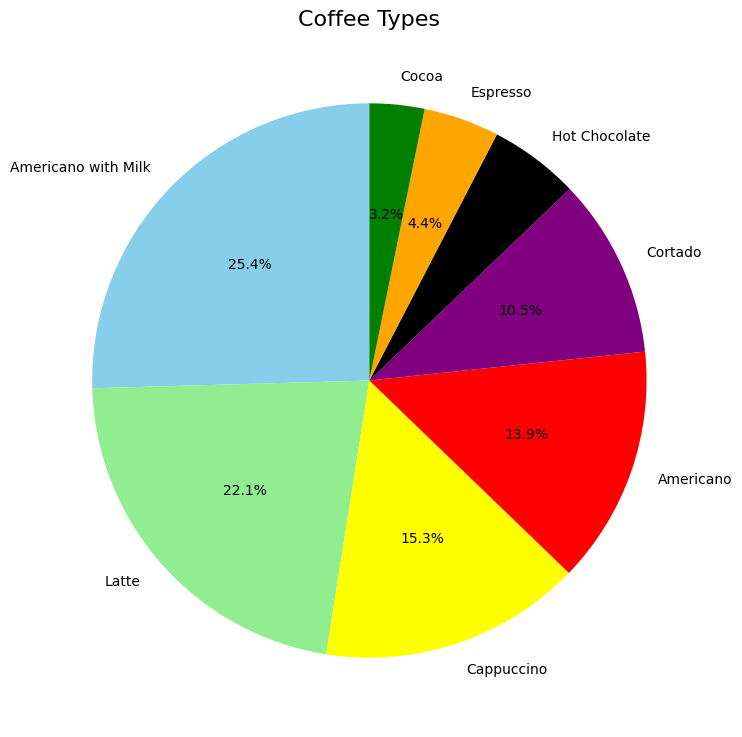

In [29]:
# Plotting pie chart

plt.figure(figsize=(9,9))
coffeeType.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'yellow', 'red', 'purple', 'black', 'orange', 'green'])

plt.title('Coffee Types', fontsize=16)
plt.ylabel('')

plt.show()

# Total Sales per Day

In [19]:
# First we have to group money according to date

daily_sale = newDf.groupby('date')['money'].sum()
daily_sale = daily_sale.sort_index()
daily_sale

date
2024-03-01    396.30
2024-03-02    188.10
2024-03-03    309.10
2024-03-04    135.20
2024-03-05    338.50
               ...  
2024-09-18    121.48
2024-09-19    157.72
2024-09-20    195.44
2024-09-21    428.60
2024-09-22    679.88
Name: money, Length: 203, dtype: float64

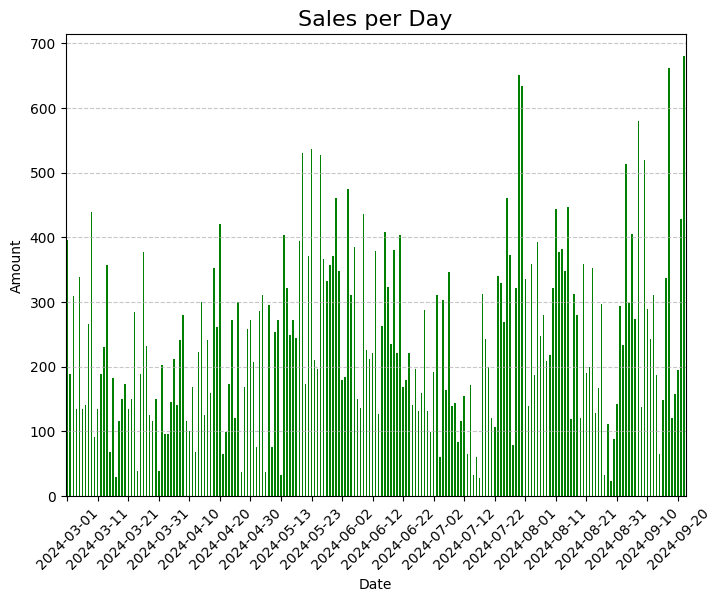

In [25]:
# Plotting bar chart

plt.figure(figsize=(8,6))
daily_sale.plot(kind='bar', color='green')

plt.title('Sales per Day', fontsize=16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Amount', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, len(daily_sale), 10), rotation=45)

plt.show()